In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from ipywidgets import *
from IPython.display import display, HTML
import plotly.io as pio
import seaborn as sns

# set seaborn style
sns.set_style("darkgrid")

In [18]:
from ipywidgets.embed import embed_minimal_html, dependency_state
embed_minimal_html('interactive-eda-beetle-damage-export.html',views=[Tree_filter, cause_filter, state_filter,out] )#, state=dependency_state([Tree_filter, cause_filter, state_filter,out]

In [3]:
%precision 2
%config InlineBackend.figure_format = 'retina'
from IPython.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))

In [4]:
pd.set_option("mode.chained_assignment", None)

### Tabelle 41261-0012
- Schadholzeinschlag: Bundesländer, Jahre, Einschlagsursache,Holzartengruppen, Waldeigentumsarten
- Publication: 08.06.2021 17:22:31 
- https://www-genesis.destatis.de/genesis/downloads/12/tables/41261-0012_12.csv

http://vanoproy.be/www/python/41261-0012Schadholzeinschlag_Bundeslander_Einschlagsursache.csv

In [6]:
def Schadholzeinschlag_Bundesländer_Einschlagsursache():
    States =['Baden-Württemberg','Bayern','Berlin','Brandenburg','Bremen','Hamburg','Hessen','Mecklenburg-Vorpommern','Niedersachsen',
        'Nordrhein-Westfalen', 'Rheinland-Pfalz','Saarland','Sachsen','Sachsen-Anhalt','Schleswig-Holstein','Thüringen']
    Causes =['Insects', "Wind/Storm", "Snow/Ice","Drought",'Total']  #"unknown",
    Tree_types =['Oak and red oak', 'Beech and other deciduous wood','Pine and larch','Spruce, fir,Douglas fir and other coniferous trees','Total']
    
    url= "http://vanoproy.be/python/41261-0012Schadholzeinschlag_Bundeslander_Einschlagsursache.csv" # www/
    #s=requests.get(url).content
    #c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    Timbercut_causeB = pd.read_csv(url, sep=";",skiprows=6, engine="python",encoding="ANSI",skipfooter=4,decimal=",")# , nrows=nrows
    Timbercut_causeB=Timbercut_causeB[Timbercut_causeB.Owner=="Insgesamt"]
    #Timbercut_causeB 

    #Timbercut_causeB["value"] =Timbercut_causeB["value"].astype( "float32") 
    Timbercut_causeB =Timbercut_causeB.replace("-","0")  # fillna( 0)   #
    lossyears= [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

    Timbercut_causeB["Year"]= Timbercut_causeB.loc[:,"Year"].astype("int16")
    Timbercut_causeB2018All= Timbercut_causeB[Timbercut_causeB.Year.isin(lossyears )]   #.copy()
    #Timbercut_causeB2018All.sample(10)

    treetypedict= {"Fichte, Tanne, Douglasie und sonstiges Nadelholz":'Spruce, fir,Douglas fir and other coniferous trees', "Kiefer und Lärche":'Pine and larch',
                       "Buche und sonstiges Laubholz":"Beech and other deciduous wood", "Eiche und Roteiche":"Oak and red oak","Insgesamt":"Total", "Insekten":"Insects","Trockenheit":"Drought",
                       "Schnee/Duft":"Snow/Ice","Wind/Sturm":"Wind/Storm","Sonstiges":"Other"}
    Timbercut_causeB2018All["Cause"]= Timbercut_causeB2018All["Cause"].map( treetypedict )
    Timbercut_causeB2018All["Tree_type"] = Timbercut_causeB2018All["Tree_type"].map( treetypedict)
    df =Timbercut_causeB2018All.melt(id_vars=["Year","Cause","Tree_type","Owner"], var_name="German State")
    df['Year'] =pd.to_datetime( df.Year, format='%Y' ) # .astype('datetime64["Y"]')  np.datetime64(1, 'Y')
    df = df.rename( columns={"value": "Value"}, errors="raise" )            # avoid strange behavior
    df.Value =df.Value.astype( "float32")   #is_numeric() 
    df['Cause'] = df.Cause.replace( np.nan, "unknown") 
    print(df.head() )
    return df

In [7]:
df = Schadholzeinschlag_Bundesländer_Einschlagsursache()

        Year       Cause                                          Tree_type  \
0 2011-01-01  Wind/Storm                                    Oak and red oak   
1 2011-01-01  Wind/Storm                     Beech and other deciduous wood   
2 2011-01-01  Wind/Storm                                     Pine and larch   
3 2011-01-01  Wind/Storm  Spruce, fir,Douglas fir and other coniferous t...   
4 2011-01-01  Wind/Storm                                              Total   

       Owner       German State       Value  
0  Insgesamt  Baden-Württemberg    3.300000  
1  Insgesamt  Baden-Württemberg   28.100000  
2  Insgesamt  Baden-Württemberg    5.800000  
3  Insgesamt  Baden-Württemberg  113.000000  
4  Insgesamt  Baden-Württemberg  150.100006  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year          4800 non-null   datetime64[ns]
 1   Cause         4800 non-null   object        
 2   Tree_type     4800 non-null   object        
 3   Owner         4800 non-null   object        
 4   German State  4800 non-null   object        
 5   Value         4800 non-null   float32       
dtypes: datetime64[ns](1), float32(1), object(4)
memory usage: 206.4+ KB


In [9]:
df.tail(23)

Year     Cause                                          Tree_type  \
4777 2020-01-01  Snow/Ice                                     Pine and larch   
4778 2020-01-01  Snow/Ice  Spruce, fir,Douglas fir and other coniferous t...   
4779 2020-01-01  Snow/Ice                                              Total   
4780 2020-01-01   Insects                                    Oak and red oak   
4781 2020-01-01   Insects                     Beech and other deciduous wood   
4782 2020-01-01   Insects                                     Pine and larch   
4783 2020-01-01   Insects  Spruce, fir,Douglas fir and other coniferous t...   
4784 2020-01-01   Insects                                              Total   
4785 2020-01-01   Drought                                    Oak and red oak   
4786 2020-01-01   Drought                     Beech and other deciduous wood   
4787 2020-01-01   Drought                                     Pine and larch   
4788 2020-01-01   Drought  Spruce, fir,Douglas fir and other coniferous t...   
4789 2020-01-01   Drought                                              Total   
4790 2020-01-01     Other                                    Oak and red oak   
4791 2020-01-01     Other                     Beech and other deciduous wood   
4792 2020-01-01     Other                                     Pine and larch   
4793 2020-01-01     Other  Spruce, fir,Douglas fir and other coniferous t...   
4794 2020-01-01     Other                                              Total   
4795 2020-01-01     Total                                    Oak and red oak   
4796 2020-01-01     Total                     Beech and other deciduous wood   
4797 2020-01-01     Total                                     Pine and larch   
4798 2020-01-01     Total  Spruce, fir,Douglas fir and other coniferous t...   
4799 2020-01-01     Total                                              Total   

          Owner German State        Value  
4777  Insgesamt    Thüringen     0.000000  
4778  Insgesamt    Thüringen     0.000000  
4779  Insgesamt    Thüringen     0.000000  
4780  Insgesamt    Thüringen     2.900000  
4781  Insgesamt    Thüringen     8.500000  
4782  Insgesamt    Thüringen    28.700001  
4783  Insgesamt    Thüringen  2827.199951  
4784  Insgesamt    Thüringen  2867.300049  
4785  Insgesamt    Thüringen    16.200001  
4786  Insgesamt    Thüringen   260.899994  
4787  Insgesamt    Thüringen    51.299999  
4788  Insgesamt    Thüringen   659.000000  
4789  Insgesamt    Thüringen   987.400024  
4790  Insgesamt    Thüringen     4.100000  
4791  Insgesamt    Thüringen    65.199997  
4792  Insgesamt    Thüringen    12.900000  
4793  Insgesamt    Thüringen   164.800003  
4794  Insgesamt    Thüringen   246.899994  
4795  Insgesamt    Thüringen    23.700001  
4796  Insgesamt    Thüringen   350.799988  
4797  Insgesamt    Thüringen    96.300003  
4798  Insgesamt    Thüringen  3860.300049  
4799  Insgesamt    Thüringen  4331.100098

In [10]:
States =['Baden-Württemberg','Bayern','Berlin','Brandenburg','Bremen','Hamburg','Hessen','Mecklenburg-Vorpommern','Niedersachsen',
        'Nordrhein-Westfalen', 'Rheinland-Pfalz','Saarland','Sachsen','Sachsen-Anhalt','Schleswig-Holstein','Thüringen']
Causes =['Insects', "Wind/Storm", "Snow/Ice","Drought",'Total']  #"unknown",
Tree_types =['Oak and red oak', 'Beech and other deciduous wood','Pine and larch','Spruce, fir,Douglas fir and other coniferous trees','Total']

# Pick State / damage / Tree_type
state_filter = widgets.RadioButtons(description='Pick State', options=States, value="Nordrhein-Westfalen",layout={'width': 'max-content'},rows=10)
#state_filter.description_width=500
cause_filter = widgets.RadioButtons(description='Pick cause of damage', options=Causes, value="Insects", tooltip='Pick a cause of tree damage',layout={'width': 'max-content'}, )
#cause_filter.description_width=500
Tree_filter = widgets.RadioButtons(description='Pick Tree type', options= Tree_types,description_width=500, value="Spruce, fir,Douglas fir and other coniferous trees",layout={'width': 'max-content'},)
#Tree_filter.description_width=500
#out2 = widgets.Output()

## The volume of damaged tree cuttings by federal German state since 2015 
The cause of damage are the totals of cuttings in 1000 m³.

In [29]:
pd.set_option("mode.chained_assignment", None)

In [11]:
def f(a, b, c):
    print('{} & {} & {}'.format(a, b, c))  # 
    
    data= df.copy().drop(columns="Owner", axis=1)
    dfB = data[ (data.loc[:,"Tree_type"]== Tree_filter.value)& (data.loc[:,"Cause"]==cause_filter.value )& (data.loc[:,"German State"]== state_filter.value )]
    dfB = dfB.loc[:, ["Year","Value"]]
    dfB = dfB.set_index("Year")
    #fig, ax = plt.subplots(1,1, )
    dfB.plot(y="Value", figsize=(10,7 ),title=(str(Tree_filter.value)+" in "+str(state_filter.value)),ylabel="1000 m³", grid=True,fontsize=12) # 
    return dfB

In [12]:
out = widgets.interactive_output(f, {'a': Tree_filter, 'b': cause_filter, 'c': state_filter}) # 'd':out2

In [13]:
widgets.HBox([widgets.VBox([ Tree_filter, cause_filter, state_filter ]), out ], width=1990) # display( out2)

In [14]:
Tree_filter.value

'Spruce, fir,Douglas fir and other coniferous trees'

### Timelines of total timber cuttings per German state.

In [15]:
data=df.copy()
data= data.drop(columns="Owner", axis=1)
data

Year       Cause  \
0    2011-01-01  Wind/Storm   
1    2011-01-01  Wind/Storm   
2    2011-01-01  Wind/Storm   
3    2011-01-01  Wind/Storm   
4    2011-01-01  Wind/Storm   
...         ...         ...   
4795 2020-01-01       Total   
4796 2020-01-01       Total   
4797 2020-01-01       Total   
4798 2020-01-01       Total   
4799 2020-01-01       Total   

                                              Tree_type       German State  \
0                                       Oak and red oak  Baden-Württemberg   
1                        Beech and other deciduous wood  Baden-Württemberg   
2                                        Pine and larch  Baden-Württemberg   
3     Spruce, fir,Douglas fir and other coniferous t...  Baden-Württemberg   
4                                                 Total  Baden-Württemberg   
...                                                 ...                ...   
4795                                    Oak and red oak          Thüringen   
4796                     Beech and other deciduous wood          Thüringen   
4797                                     Pine and larch          Thüringen   
4798  Spruce, fir,Douglas fir and other coniferous t...          Thüringen   
4799                                              Total          Thüringen   

            Value  
0        3.300000  
1       28.100000  
2        5.800000  
3      113.000000  
4      150.100006  
...           ...  
4795    23.700001  
4796   350.799988  
4797    96.300003  
4798  3860.300049  
4799  4331.100098  

[4800 rows x 5 columns]

In [17]:
#fig, ax = plt.subplots(1,1, )
data=df.copy()
df2 =data[ (data["Tree_type"]== "Total")& (data["Cause"]== "Total" )]  # ["German State","Value"]
df2 =df2 [ (df2["German State"]!= "Berlin")& (df2["German State"]!= "Hamburg" )] 
df2.Value =df2.Value.astype( "float32") 
df2 =df2.loc[:, ["Year","German State","Value"]]
#df2 = df2.set_index(["Year","German State"]) # 
df2 = df2.sort_values(["Year","Value","German State"] ) 
fig= px.area( df2,x="Year",y="Value",color="German State",log_y=True,markers=False,symbol="German State",template="seaborn",)  #linewidth=1 barmode="group",
fig.update_layout(title='Total timber cuttings per German state', #xaxis_title='Month',
                   yaxis_title='1000 m^3)')
fig.show()

In [18]:
df2

Year            German State         Value
1229 2011-01-01                  Bremen      0.000000
2129 2011-01-01  Mecklenburg-Vorpommern     15.500000
4229 2011-01-01      Schleswig-Holstein     23.100000
3329 2011-01-01                Saarland     62.900002
929  2011-01-01             Brandenburg     77.099998
...         ...                     ...           ...
299  2020-01-01       Baden-Württemberg   6043.899902
3299 2020-01-01         Rheinland-Pfalz   6142.799805
2099 2020-01-01                  Hessen   8111.100098
599  2020-01-01                  Bayern  10697.200195
2999 2020-01-01     Nordrhein-Westfalen  14224.500000

[140 rows x 3 columns]

### Insect damage on Spruce, Fir, Douglas Fir and other coniferous trees

In [17]:
#fig, ax = plt.subplots(1,1, )
df3 =data[ (data["Tree_type"]== "Spruce, fir,Douglas fir and other coniferous trees")]  #& (data["Cause"]== "Total" ) ["German State","Value"]
df3 =data[ (data["Cause"]== "Insects")] 
df3 =df3 [ (df3["German State"]!= "Berlin")& (df3["German State"]!= "Hamburg" )] 
df3.Value =df3.Value.astype( "float32") 
df3 =df3.loc[:, ["Year","German State","Value","Cause"]]
df3.sample(10)

Year        German State       Value    Cause
4334 2015-01-01  Schleswig-Holstein    6.200000  Insects
3430 2015-01-01            Saarland    0.500000  Insects
3610 2011-01-01             Sachsen    0.000000  Insects
4180 2020-01-01      Sachsen-Anhalt    8.800000  Insects
3882 2020-01-01             Sachsen  195.899994  Insects
3493 2017-01-01            Saarland   30.299999  Insects
2593 2017-01-01       Niedersachsen   76.800003  Insects
4094 2017-01-01      Sachsen-Anhalt   61.599998  Insects
342  2012-01-01              Bayern    5.700000  Insects
3344 2012-01-01            Saarland   22.200001  Insects

In [18]:
df3 =df3.groupby(["Year","German State","Cause"])["Value"].max().reset_index()   # as the totals are included
#df2 = df2.set_index(["Year","German State"]) # 
#df2 = df2.sort_index() 
fig= px.line( df3,x="Year", y="Value", color="German State", log_y=True, template="seaborn",) #mode="lines" facet_row="Cause",barmode="group",
fig.update_layout(
    showlegend=True, height=600, #plot_bgcolor="white",
    margin=dict(t=1,l=1,b=1,r=1)
)
fig.show(config=dict(displayModeBar=False))

In [40]:
df3.sample(10)

Year        German State    Cause        Value
72 2018-01-01         Brandenburg  Insects   296.100006
26 2014-01-01  Schleswig-Holstein  Insects     6.700000
43 2016-01-01              Bayern  Insects  3446.199951
95 2019-01-01      Sachsen-Anhalt  Insects  1098.400024
92 2019-01-01     Rheinland-Pfalz  Insects  3059.600098
6  2013-01-01       Niedersachsen  Insects    59.200001
66 2017-01-01             Sachsen  Insects    29.100000
57 2017-01-01              Bayern  Insects  4104.399902
76 2018-01-01       Niedersachsen  Insects   918.599976
82 2018-01-01  Schleswig-Holstein  Insects    48.900002

### Cause of damage versus Tree_type

In [52]:
df1 =data[ (data["Tree_type"]!= "Total")& (data["Cause"]!= "Total" )]  # without totals
df1= pd.pivot_table( index=["Year","German State","Cause"], columns= ["Tree_type"], values="Value", data=df1)#, 
df1

Tree_type                                Beech and other deciduous wood  \
Year       German State      Cause                                        
2011-01-01 Baden-Württemberg Drought                           0.000000   
                             Insects                          13.000000   
                             Other                            44.900002   
                             Snow/Ice                          4.500000   
                             Wind/Storm                       28.100000   
...                                                                 ...   
2020-01-01 Thüringen         Drought                         260.899994   
                             Insects                           8.500000   
                             Other                            65.199997   
                             Snow/Ice                          0.000000   
                             Wind/Storm                       16.200001   

Tree_type                                Oak and red oak  Pine and larch  \
Year       German State      Cause                                         
2011-01-01 Baden-Württemberg Drought            0.000000        0.000000   
                             Insects            7.000000        4.600000   
                             Other              7.900000       13.900000   
                             Snow/Ice           0.500000        2.100000   
                             Wind/Storm         3.300000        5.800000   
...                                                  ...             ...   
2020-01-01 Thüringen         Drought           16.200001       51.299999   
                             Insects            2.900000       28.700001   
                             Other              4.100000       12.900000   
                             Snow/Ice           0.000000        0.000000   
                             Wind/Storm         0.500000        3.400000   

Tree_type                                Spruce, fir,Douglas fir and other coniferous trees  
Year       German State      Cause                                                           
2011-01-01 Baden-Württemberg Drought                                              0.000000   
                             Insects                                            107.199997   
                             Other                                               62.000000   
                             Snow/Ice                                            28.299999   
                             Wind/Storm                                         113.000000   
...                                                                                    ...   
2020-01-01 Thüringen         Drought                                            659.000000   
                             Insects                                           2827.199951   
                             Other                                              164.800003   
                             Snow/Ice                                             0.000000   
                             Wind/Storm                                         209.399994   

[800 rows x 4 columns]

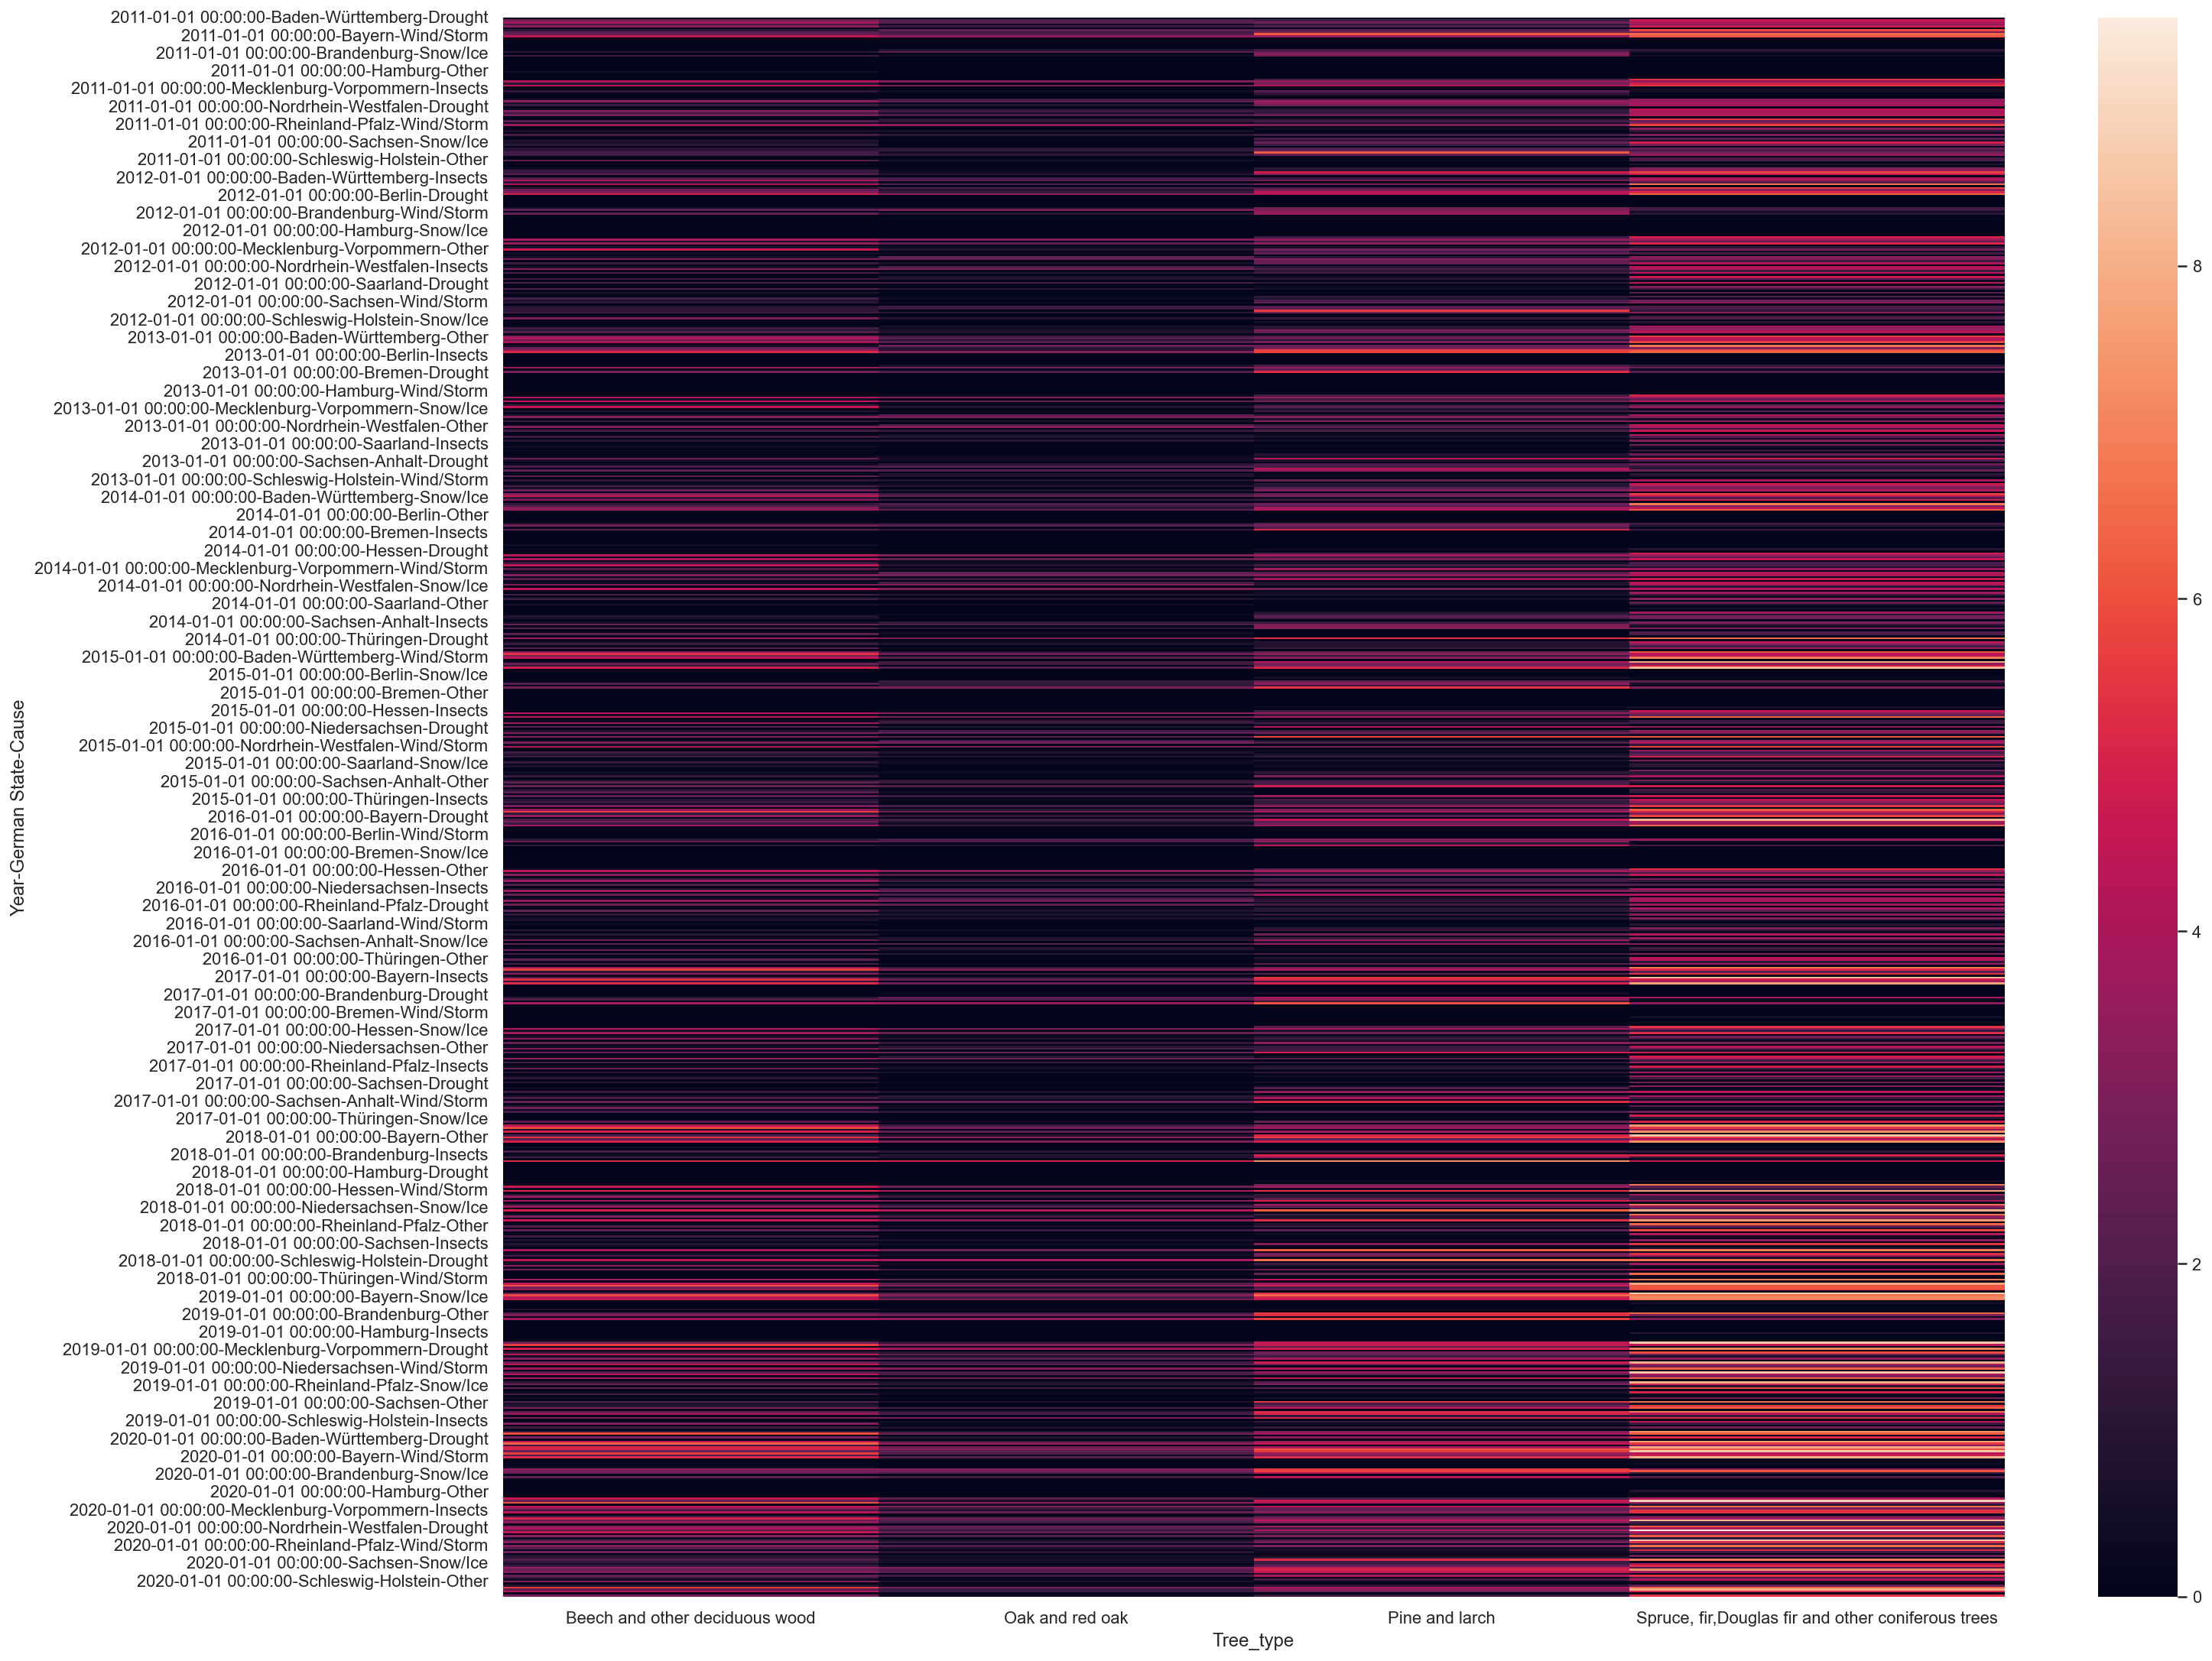

In [57]:
df1log= np.log( (df1 +1) ) ; 
fig, ax = plt.subplots(1,1, figsize=(22,19) )
sns.heatmap( data=df1log);  # Owner"

In [54]:
df1log

Tree_type                                Beech and other deciduous wood  \
Year       German State      Cause                                        
2011-01-01 Baden-Württemberg Drought                           0.000000   
                             Insects                           0.002639   
                             Other                             0.003826   
                             Snow/Ice                          0.001705   
                             Wind/Storm                        0.003371   
...                                                                 ...   
2020-01-01 Thüringen         Drought                           0.005568   
                             Insects                           0.002251   
                             Other                             0.004193   
                             Snow/Ice                          0.000000   
                             Wind/Storm                        0.002845   

Tree_type                                Oak and red oak  Pine and larch  \
Year       German State      Cause                                         
2011-01-01 Baden-Württemberg Drought            0.000000        0.000000   
                             Insects            0.002079        0.001723   
                             Other              0.002186        0.002701   
                             Snow/Ice           0.000405        0.001131   
                             Wind/Storm         0.001459        0.001917   
...                                                  ...             ...   
2020-01-01 Thüringen         Drought            0.002845        0.003957   
                             Insects            0.001361        0.003391   
                             Other              0.001629        0.002632   
                             Snow/Ice           0.000000        0.000000   
                             Wind/Storm         0.000405        0.001482   

Tree_type                                Spruce, fir,Douglas fir and other coniferous trees  
Year       German State      Cause                                                           
2011-01-01 Baden-Württemberg Drought                                              0.000000   
                             Insects                                              0.004684   
                             Other                                                0.004143   
                             Snow/Ice                                             0.003378   
                             Wind/Storm                                           0.004736   
...                                                                                    ...   
2020-01-01 Thüringen         Drought                                              0.006492   
                             Insects                                              0.007947   
                             Other                                                0.005111   
                             Snow/Ice                                             0.000000   
                             Wind/Storm                                           0.005349   

[800 rows x 4 columns]

##### logging.Handler for debugging etc.